<h2>Building the Batters Tensor</h2>

<p>I've separated this from the model itself so that we could visualize and work through the data, but in the actual script this will just be a short few lines at the beginning of the model file.</p>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Loading the Data</h3>

In [33]:
df = pd.read_csv('../core/output/pitchers.csv')

In [34]:
indexer = df.reset_index()[['index', 'retroID']].to_dict()['retroID']

In [35]:
y = df['Pitching'].values

In [36]:
y

array([0.602913, 0.636924, 0.603736, ..., 0.612847, 0.608497, 0.611166])

In [37]:
df.columns

Index(['retroID', 'BAOpp', 'CG', 'SHO', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO',
       'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP', 'K%',
       'IP', 'K/9', 'BB/9', 'HR/9', 'BABIP', 'LOB%', 'ERA', 'FIP', 'WAR',
       'Pitching'],
      dtype='object')

In [38]:
to_drop = ['retroID', 'Pitching']

In [39]:
df = df.drop(columns=to_drop)

<h3>Observing Data Information</h3>

(29.0, 0.0)

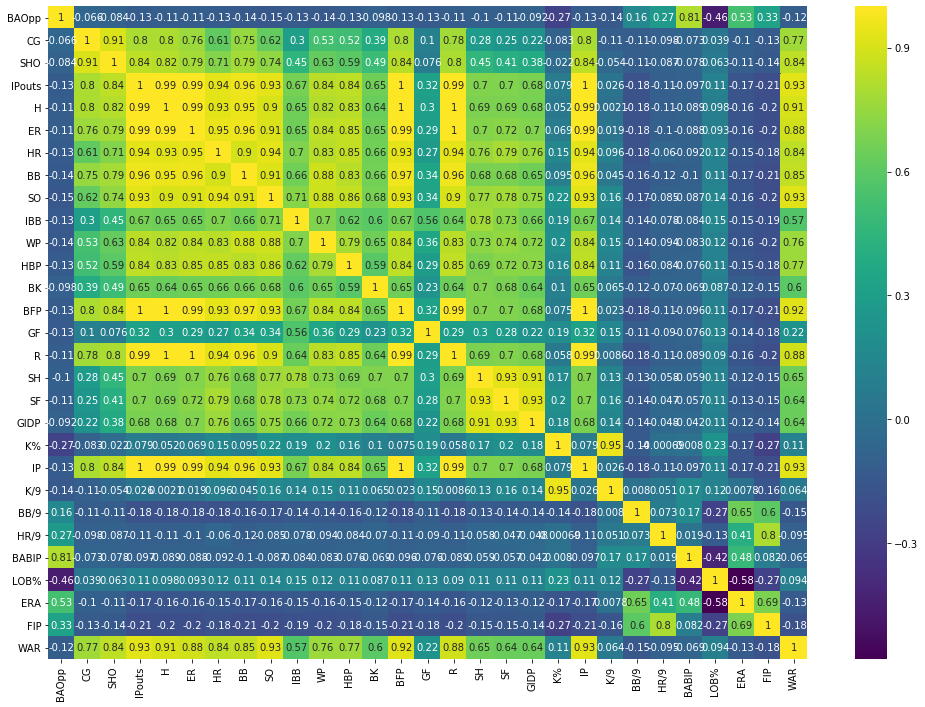

In [40]:
plt.figure(figsize=(17,12))
ax = sns.heatmap(df.corr(), annot=True, cmap='viridis')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<p>We see a lot of correlations with both IPouts and BFP, so we'll drop those.</p>

In [41]:
df = df.drop(columns=['IPouts', 'BFP'])

(27.0, 0.0)

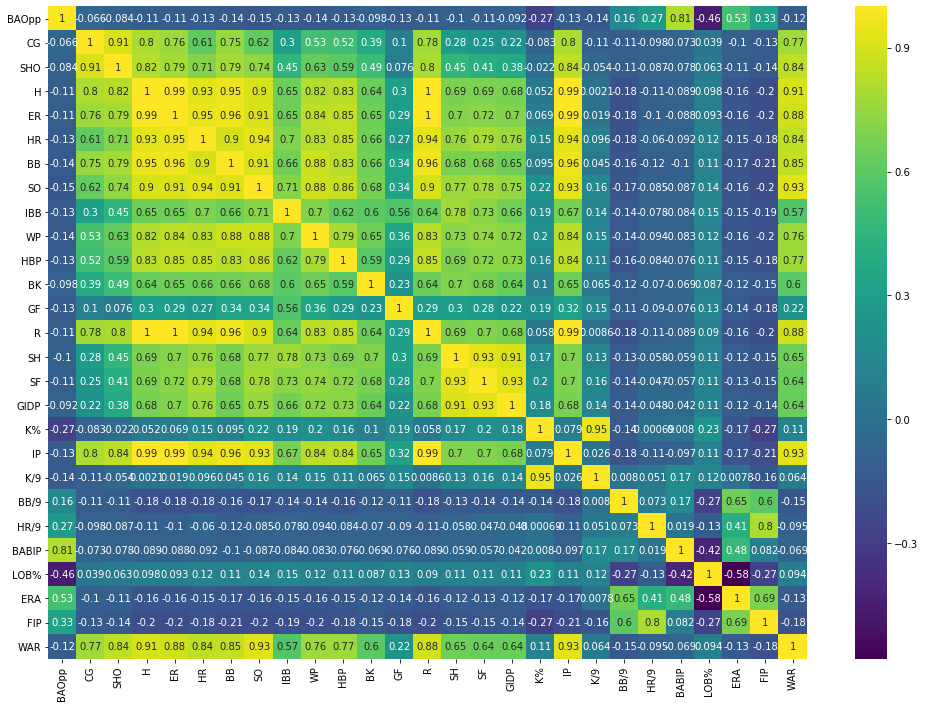

In [42]:
plt.figure(figsize=(17,12))
ax = sns.heatmap(df.corr(), annot=True, cmap='viridis')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<p>I think R (runs) is sufficiently covered by ER (earned runs) and HR (home runs), so I'll drop it too.</p>

In [43]:
df = df.drop(columns=['R'])

(26.0, 0.0)

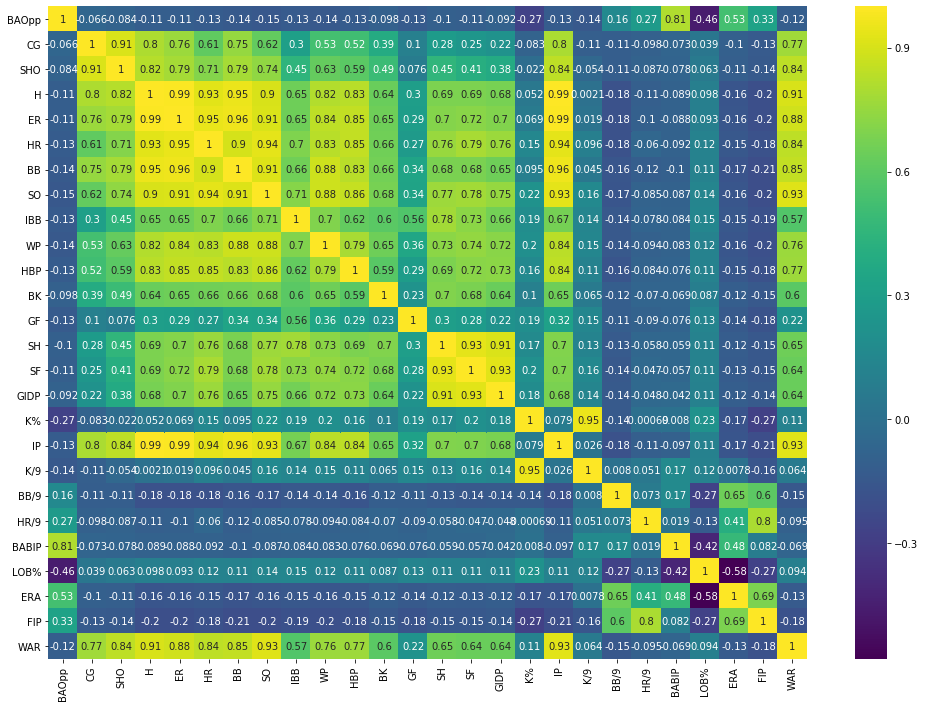

In [44]:
plt.figure(figsize=(17,12))
ax = sns.heatmap(df.corr(), annot=True, cmap='viridis')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<p>I'm happy with this version of the tensor.</p>

In [45]:
# We'll add the 'Pitching' column back in to save our tensor
df.insert(loc=len(df.columns), column='Pitching', value=y)

In [46]:
df

,BAOpp,CG,SHO,H,ER,HR,BB,SO,IBB,WP,...,IP,K/9,BB/9,HR/9,BABIP,LOB%,ERA,FIP,WAR,Pitching
0,0.2574,0,0,296,160,41,183,340,22,12,...,0.062360,9.08,4.89,1.09,0.285,74.5,4.27,4.45,1.1,0.602913
1,0.2508,22,5,1085,468,89,457,641,45,22,...,0.205233,5.20,3.71,0.72,0.282,73.4,3.80,3.85,11.7,0.636924
2,0.2447,0,0,309,135,42,116,280,10,10,...,0.061102,7.62,3.16,1.14,0.281,77.7,3.67,4.24,0.6,0.603736
3,0.2786,37,5,1405,627,162,352,484,28,18,...,0.237967,3.39,2.46,1.13,0.278,69.3,4.39,4.46,10.2,0.628847
4,0.2804,31,6,1779,791,154,620,888,30,53,...,0.309765,4.77,3.33,0.83,0.295,70.0,4.25,4.25,22.7,0.666725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,0.2700,30,5,956,366,54,301,207,0,8,...,0.171925,2.00,2.91,0.52,0.267,70.7,3.54,3.80,9.3,0.630540
8021,0.2717,23,3,767,374,35,468,383,0,28,...,0.145445,4.39,5.36,0.40,0.283,69.0,4.28,3.96,3.3,0.610437
8022,0.2286,0,0,169,71,18,114,210,11,16,...,0.038711,9.01,4.89,0.77,0.267,78.7,3.00,3.94,2.7,0.612847
8023,0.2760,9,2,660,253,56,203,223,29,10,...,0.118817,3.12,2.84,0.78,0.270,73.2,3.54,3.93,1.9,0.608497
